import library

In [268]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import zipfile
from sklearn import metrics
import seaborn as sns
from sklearn import model_selection, naive_bayes, svm, tree, neighbors
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


download data

In [269]:
!kaggle datasets download -d fatemehmehrparvar/obesity-levels

Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels
License(s): Attribution 4.0 International (CC BY 4.0)
obesity-levels.zip: Skipping, found more recently modified local copy (use --force to force download)


extract data

In [270]:
zip_ref = zipfile.ZipFile('obesity-levels.zip', 'r')
zip_ref.extractall('obesity-levels')
zip_ref.close()

read data

In [271]:
df = pd.read_csv('obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


check data

In [272]:
# df.isnull()
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [273]:
# df[df.isna()]
df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

preprocessed data

In [274]:
df[df.duplicated()]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
106,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
209,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
467,22.0,Male,1.74,75.0,no,yes,3.0,3.0,no,no,1.0,yes,1.0,0.0,Frequently,Automobile,Normal_Weight
496,18.0,Male,1.72,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [275]:
df.shape

(2111, 17)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [277]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [278]:
df[df['FCVC']==2.385502]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
1495,29.409825,Male,1.801224,108.15619,Sometimes,yes,2.385502,2.883984,no,no,2.140544,yes,1.144876,1.767468,Sometimes,Automobile,Obesity_Type_I


In [279]:
df['FCVC'].value_counts()

FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64

In [280]:
# df = df.drop(['FCVC'], axis=1)
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


convert Age to type Int

In [281]:
# Kiểm tra xem có giá trị NaN nào trong cột tuổi không
if df['Age'].isnull().sum() > 0:
    print("There are NaN values in the 'Age' column. Please handle them before converting.")
else:
    df['Age'] = df['Age'].astype(int)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [283]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.308664,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.000000,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [284]:
df['Age'].value_counts()

Age
21    271
18    238
19    186
23    163
22    161
25    159
26    139
20    137
24     84
17     82
30     65
31     46
29     43
33     36
37     33
38     31
27     31
16     29
34     28
40     22
28     22
39     20
32     18
36     12
35     12
41     11
43      7
42      5
55      5
45      4
47      2
56      1
51      1
44      1
14      1
15      1
50      1
52      1
46      1
61      1
Name: count, dtype: int64

convert FCVC, NPC, FAF to Int

In [285]:
cols_to_convert = ['FCVC', 'NCP', 'FAF']
for col in cols_to_convert:
    if df[col].isnull().sum() > 0:
        print(f"There are NaN values in the '{col}' column. Please handle them before converting.")
    else:
        df[col] = df[col].astype(int)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [287]:
df['FCVC'].value_counts() 

FCVC
2    1257
3     652
1     202
Name: count, dtype: int64

In [288]:
df['FAF'].value_counts()

FAF
0    1011
1     724
2     301
3      75
Name: count, dtype: int64

lable encoder

In [289]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler
label_encoder=LabelEncoder()

cat_cols=['Gender','CALC','FAVC','SCC','SMOKE','family_history_with_overweight','CAEC','MTRANS','NObeyesdad']
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(label_encoder.classes_)

['Female' 'Male']
['Always' 'Frequently' 'Sometimes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['Always' 'Frequently' 'Sometimes' 'no']
['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']
['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   int64  
 1   Gender                          2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   SCC                             2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   int64  
 12  FAF                             21

In [291]:
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,0,1.62,64.0,3,0,2,3,0,0,2.0,1,0,1.0,2,3,1
1,21,0,1.52,56.0,2,0,3,3,1,1,3.0,1,3,0.0,2,3,1
2,23,1,1.80,77.0,1,0,2,3,0,0,2.0,1,2,1.0,2,3,1
3,27,1,1.80,87.0,1,0,3,3,0,0,2.0,0,2,0.0,2,4,5
4,22,1,1.78,89.8,2,0,2,1,0,0,2.0,0,0,0.0,2,3,6
5,29,1,1.62,53.0,2,1,2,3,0,0,2.0,0,0,0.0,2,0,1
6,23,0,1.50,55.0,2,1,3,3,0,0,2.0,1,1,0.0,2,2,1
7,22,1,1.64,53.0,2,0,2,3,0,0,2.0,0,3,0.0,2,3,1
8,24,1,1.78,64.0,1,1,3,3,0,0,2.0,1,1,1.0,2,3,1
9,22,1,1.72,68.0,3,1,2,3,0,0,2.0,1,1,1.0,2,3,1


heat map

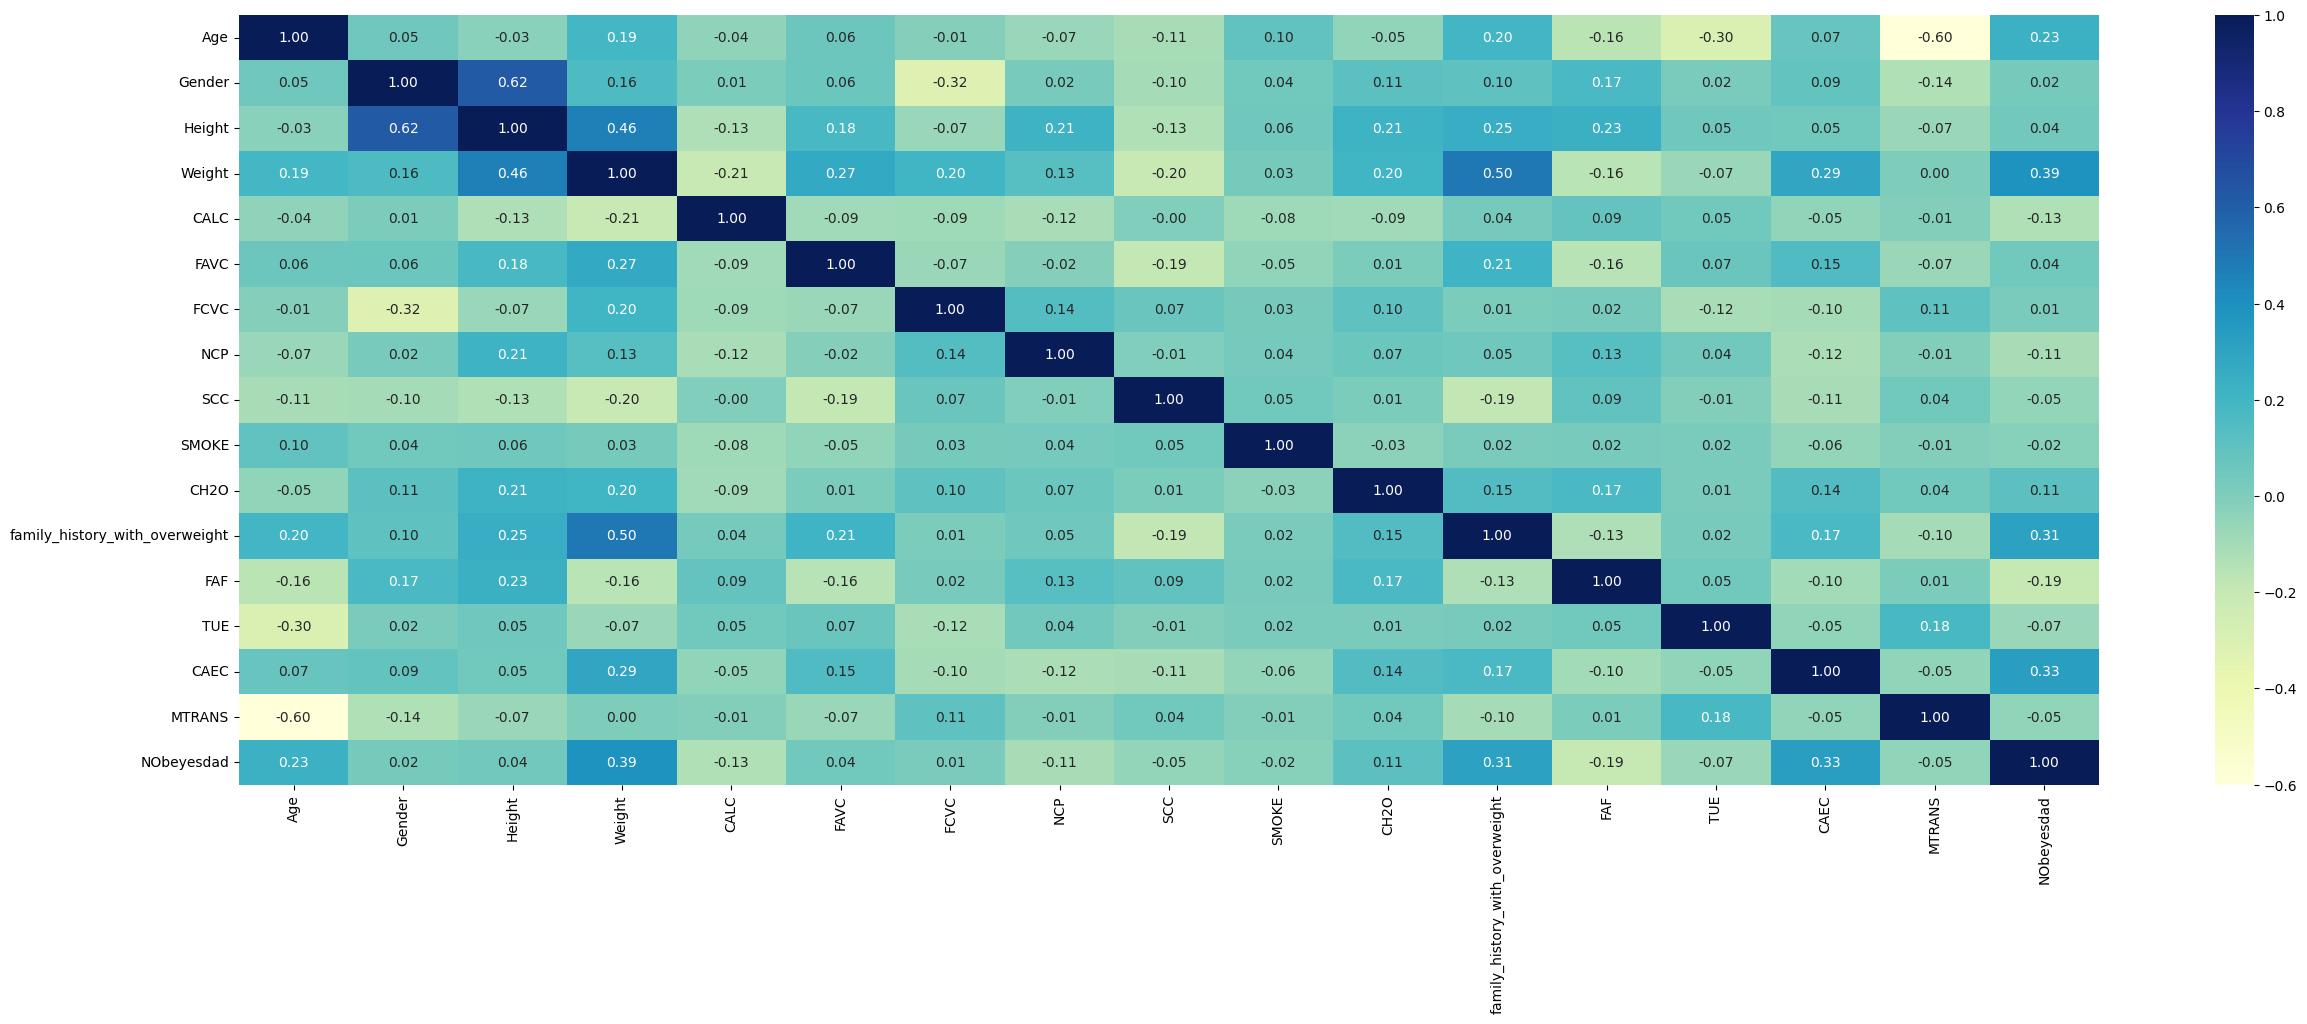

In [292]:
corr = df.corr()
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

Check the distribution of the features

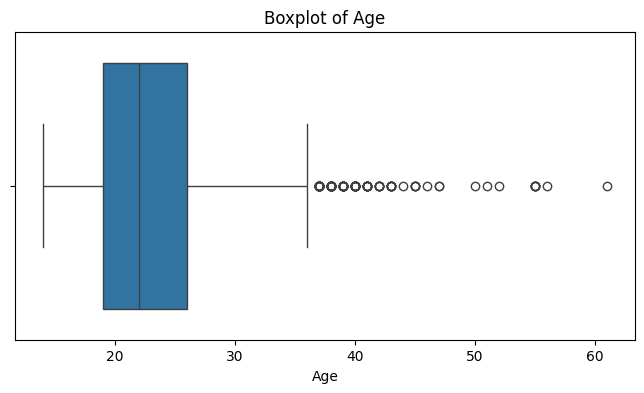

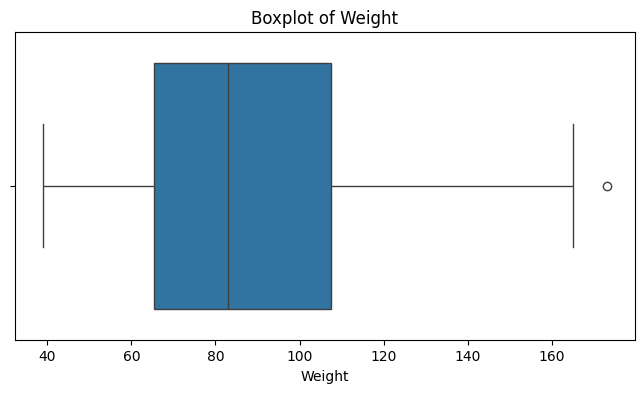

In [293]:
features = ['Age', 'Weight']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

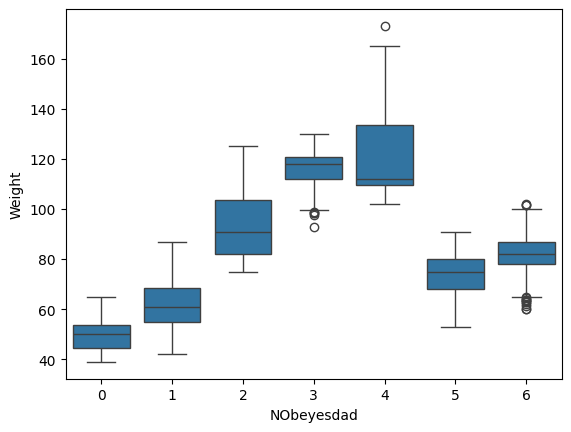

In [294]:
sns.boxplot(x='NObeyesdad', y='Weight', data=df)

split to train and test data

In [295]:
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

In [296]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

creat model using DecisionTree algorithm

In [297]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

evaluate model

In [298]:
print("Train: ", model.score(x_train, y_train))
print("Accuracy: ", model.score(x_test, y_test))

Train:  1.0
Accuracy:  0.9361702127659575


In [299]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

RandomForestClassifier()

In [300]:
print("Train: ", model2.score(x_train, y_train))
print("Accuracy: ", model2.score(x_test, y_test))

Train:  1.0
Accuracy:  0.9574468085106383


In [301]:
model3 = neighbors.KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
model3.fit(x_train, y_train)

KNeighborsClassifier()

In [302]:
print("Train: ", model3.score(x_train, y_train))
print("Accuracy: ", model3.score(x_test, y_test))

Train:  0.9218009478672986
Accuracy:  0.8865248226950354


In [303]:
import pickle
filename1 = 'DTC.pkl'
pickle.dump(model, open(filename1, 'wb'))

In [304]:
filename2 = 'RFC.pkl'
pickle.dump(model, open(filename2, 'wb'))